In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate

# high pass filter

In [31]:
R = 46800
C = 11.49*10**-9
omega_c = 1/(R*C)
omega_c

1859.6624340749665

## data

In [32]:
f = np.array([25, 33, 40, 50, 70.5, 90.5, 120.5, 140.5, 160, 180 ,200, 220, 236, 260, 270, 280.5,290.5, 300, 325, 350, 400, 500, 655, 975, 1375, 1505, 1880, 3075, 5450, 8400])
Vo = np.array([0.13, 0.17, 0.198, 0.246, 0.344, 0.44, 0.56, 0.64, 0.712, 0.768, 0.85, 0.91, 0.96, 1.02, 1.04, 1.08, 1.08, 1.12, 1.16, 1.2, 1.28, 1.38, 1.48, 1.57, 1.62, 1.62, 1.64, 1.64, 1.64, 1.64])
phi_obs = np.array([86, 80, 75, 74, 72, 70, 69, 65, 60, 56, 52, 51, 47, 46, 46, 45, 42, 41, 41, 40, 39, 36, 28, 21, 10, 8, 6, 4, 0, 0])

In [33]:
Vi = 1.7
omega_by_omega_c = 2*np.pi*f/omega_c
gain_obs = Vo/Vi
gain_dB = 20*np.log10(gain_obs)
gain_comp = 1/np.sqrt(1+np.power(1/omega_by_omega_c, 2))
phi_comp = np.arctan(1/omega_by_omega_c)*180/np.pi

In [48]:
tab = np.array([f, np.round(omega_by_omega_c, 2), Vo, np.round(gain_obs, 2), np.round(gain_dB,2), np.round(gain_comp, 3), phi_obs, np.round(phi_comp)]).transpose()
print(tabulate(tab, headers=['f', 'w/wc', 'Vo', 'gain (obs)', 'gain (dB)', 'gain (comp)', 'phi (obs)', 'phi(comp)']))

     f    w/wc     Vo    gain (obs)    gain (dB)    gain (comp)    phi (obs)    phi(comp)
------  ------  -----  ------------  -----------  -------------  -----------  -----------
  25      0.08  0.13           0.08       -22.33          0.084           86           85
  33      0.11  0.17           0.1        -20             0.111           80           84
  40      0.14  0.198          0.12       -18.68          0.134           75           82
  50      0.17  0.246          0.14       -16.79          0.167           74           80
  70.5    0.24  0.344          0.2        -13.88          0.232           72           77
  90.5    0.31  0.44           0.26       -11.74          0.292           70           73
 120.5    0.41  0.56           0.33        -9.65          0.377           69           68
 140.5    0.47  0.64           0.38        -8.49          0.429           65           65
 160      0.54  0.712          0.42        -7.56          0.476           60           62
 180      

In [35]:
(1.15*omega_c)/(2*np.pi)

340.3706391951374

## graphs

Text(2.5, -15, '$\\longleftarrow$Pass Band$\\longrightarrow$')

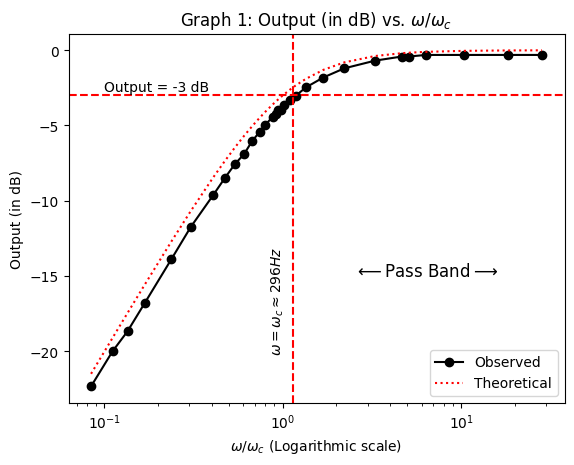

In [51]:
plt.plot(omega_by_omega_c, gain_dB, '-ko', label='Observed')
plt.plot(omega_by_omega_c, 20*np.log10(gain_comp), ':r', label='Theoretical')
plt.xscale('log')
plt.axhline(y=-3, color='r', linestyle='--')
plt.axvline(x=1.15, color='r', linestyle='--')
plt.xlabel('$\omega/\omega_c$ (Logarithmic scale)')
plt.ylabel('Output (in dB)')
plt.legend(loc='lower right')
plt.title(r'Graph 1: Output (in dB) vs. $\omega/\omega_c$')
plt.text(0.1, -2.7, 'Output = -3 dB')
plt.text(0.85, -20, r'$\omega = \omega_c \approx 296 Hz$', rotation=90)
plt.text(2.5, -15, r"$\longleftarrow$Pass Band$\longrightarrow$", fontsize=12)

Text(0.8, 0, '$\\omega=\\omega_c = 296 Hz$')

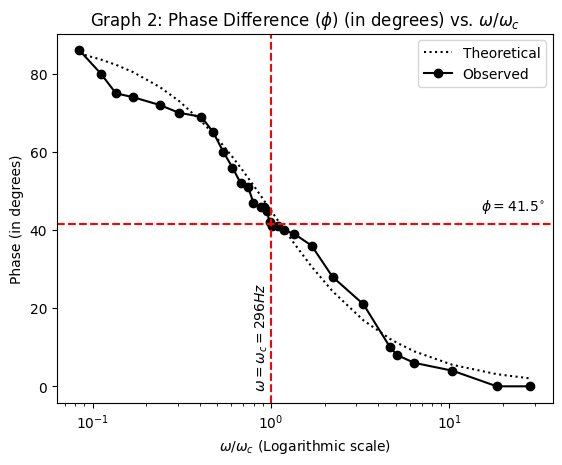

In [52]:
plt.plot(omega_by_omega_c, phi_comp, ':k', label='Theoretical')
plt.plot(omega_by_omega_c, phi_obs, '-ko', label='Observed')
plt.xscale('log')
plt.axhline(y=41.5, color='r', linestyle='--')
plt.axvline(x=1, color='r', linestyle='--')
plt.xlabel('$\omega/\omega_c$ (Logarithmic scale)')
plt.ylabel('Phase (in degrees)')
plt.title(r'Graph 2: Phase Difference ($\phi$) (in degrees) vs. $\omega/\omega_c$')
plt.legend()
plt.text(15, 45, '$\phi = 41.5^{\circ}$')
plt.text(0.8, 0, r'$\omega=\omega_c = 296 Hz$', rotation=90)